### Reading data from multiple models: the ReadGriddedMulti class

The `pyaerocom.ReadGriddedMulti` class provides an interface to import multiple variables for an arbitrary number of gridded datasets (e.g. model data, level 2 satellite data) and within a specific time interval. It makes large use of the `ReadGridded` class that provides an interface for importing results from a single dataset.

In [1]:
import os
import pyaerocom as pya
pya.change_verbosity('critical')

2018-09-25 10:52:59,519:WARNING:
basemap extension library is not installed (or cannot be imported. Some features will not be available


2018-09-25 10:53:00,282:WARNING:
geopy library is not available. Aeolus data read not enabled


Define two models (this list can contain as many models as you like)

In [2]:
models = ["AATSR_SU_v4.3", "CAM5.3-Oslo_CTRL2016"]

Again, if you are not sure what is the exact name of the dataset you are searching for, you may use wildcards to search for options. For instance, if you want to include results from the implementation of the sectional aerosol microphysics module (SALSA) in the ECHAM5-HAM aerosol-climate model, you may search if data exists ...

In [3]:
try: 
    pya.search_data_dir_aerocom("*ECHAM*salsa*CTRL*2015")
except Exception as e:
    print(repr(e))

... and include it:

In [4]:
models.append('ECHAM6-SALSA_AP3-CTRL2015')

Now create and initiate `ReadGriddedMulti` class. The directory for each model as well as all valid files in the model directories are searched on initiation of the instance. Valid here means, that the files belong to the corresponding model. Subsetting of the time interval is done in a later process.

In [5]:
read = pya.io.ReadGriddedMulti(models, '2010','2011')
print(read)


Pyaerocom ReadGriddedMulti
--------------------------
Model IDs: ['AATSR_SU_v4.3', 'CAM5.3-Oslo_CTRL2016', 'ECHAM6-SALSA_AP3-CTRL2015']

Loaded data:

Pyaerocom ReadGridded
---------------------
Model ID: AATSR_SU_v4.3
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/CCI-Aerosol/CCI_AEROSOL_Phase2/AATSR_SU_v4.3/renamed
Available variables: ['abs550aer', 'ang4487aer', 'od550aer', 'od550dust', 'od550erraer', 'od550gt1aer', 'od550lt1aer']
Available years: [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
Available time resolutions ['daily']

Pyaerocom ReadGridded
---------------------
Model ID: CAM5.3-Oslo_CTRL2016
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/CAM5.3-Oslo_CTRL2016/renamed
Available variables: ['abs550aer', 'deltaz3d', 'humidity3d', 'od440aer', 'od550aer', 'od550aer3d', 'od550aerh2o', 'od550dryaer', 'od550dust', 'od550lt1aer', 'od870aer']
Available years: [2006, 2008, 2010]
Available time reso

As you can see, the 3 different instances of the ``ReadGridded`` class were created (which was introduced in the previous tutorial), one for each of the 3 requested datasets. These can be used to access the data for each of the datasets.

Let's define a bunch of test variables that are supposed to be loaded for each model.

In [6]:
test_vars = ["od550aer", "od550dust"]

Read all variables for all models

In [7]:
result_dict = read.read(test_vars, ts_type="daily")

As we can see, for the ECHAM6 data, the import failed. The reason for this is, that these data only exists in monthly resolution. We can load this data manually.

In [8]:
r = read["ECHAM6-SALSA_AP3-CTRL2015"]
r.vars

['depbc',
 'depdust',
 'depoa',
 'depso4',
 'depss',
 'emibc',
 'emidms',
 'emidust',
 'emiso2',
 'emiso4',
 'emiss',
 'emivoc',
 'emivoct',
 'loadbc',
 'loaddust',
 'loadoa',
 'loadso4',
 'loadss',
 'od550aer',
 'od550bc',
 'od550dust',
 'od550oa',
 'od550so4',
 'od550ss',
 'sconcbc',
 'sconcdust',
 'sconcoa',
 'sconcso4',
 'sconcss']

Now read the aerosol optical depth at 550 nm and in monthly resolution.

In [9]:
r.read_var("od550aer", ts_type="monthly")

pyaerocom.GriddedData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol_particles / (1) (time: 12; latitude: 96; longitude: 192)>

Print what is in there (similar to the previously introduced `ReadGridded` class, also the `ReadGriddedMulti` class has a helpful string representation)

In [10]:
print(read)


Pyaerocom ReadGriddedMulti
--------------------------
Model IDs: ['AATSR_SU_v4.3', 'CAM5.3-Oslo_CTRL2016', 'ECHAM6-SALSA_AP3-CTRL2015']

Loaded data:

Pyaerocom ReadGridded
---------------------
Model ID: AATSR_SU_v4.3
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/CCI-Aerosol/CCI_AEROSOL_Phase2/AATSR_SU_v4.3/renamed
Available variables: ['abs550aer', 'ang4487aer', 'od550aer', 'od550dust', 'od550erraer', 'od550gt1aer', 'od550lt1aer']
Available years: [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
Available time resolutions ['daily']

Loaded GriddedData objects:

Pyaerocom GriddedData
---------------------
Variable: od550aer
Temporal resolution: daily
Start / Stop: 2010-01-01T00:00:00.000000 - 2011-01-01T00:00:00.000000

Pyaerocom GriddedData
---------------------
Variable: od550dust
Temporal resolution: daily
Start / Stop: 2010-01-01T00:00:00.000000 - 2011-01-01T00:00:00.000000

Pyaerocom ReadGridded
---------------------
Model ID: CAM5.3-Osl

Print some information about the different data objects

In [11]:
for name, result in read.results.items():
    print("Current model: %s" %name)
    for var_name, data in result.data.items():
        print("\nCurrent variable: %s" %var_name)
        # data is of type pya.GriddedData which uses an extended representation of the Cube class
        print(repr(data))

Current model: AATSR_SU_v4.3

Current variable: od550aer
pyaerocom.GriddedData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 366; latitude: 180; longitude: 360)>

Current variable: od550dust
pyaerocom.GriddedData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 366; latitude: 180; longitude: 360)>
Current model: CAM5.3-Oslo_CTRL2016

Current variable: od550aer
pyaerocom.GriddedData
Grid data: <iris 'Cube' of Aerosol optical depth at 550nm / (1) (time: 365; latitude: 192; longitude: 288)>

Current variable: od550dust
pyaerocom.GriddedData
Grid data: <iris 'Cube' of mineral aerosol optical depth 550nm / (1) (time: 365; latitude: 192; longitude: 288)>
Current model: ECHAM6-SALSA_AP3-CTRL2015

Current variable: od550aer
pyaerocom.GriddedData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol_particles / (1) (time: 12; latitude: 96; longitude: 192)>

Current variable: od550du

Now get and arbitrarily crop the CAM5.3-Oslo_CTRL2016 data object containing the od550aer values and draw a map.

In [12]:
data = read["CAM5.3-Oslo_CTRL2016"]["od550aer"]
print("\nStart / stop before crop: %s - %s\n"
      %(data.start,
        data.stop))

dat_crop = data.crop(lon_range=(-30, 30),
                     lat_range=(0, 45),
                     time_range=('15 March 2010','22 June 2010'))


print("Start / stop after crop: %s - %s"
      %(dat_crop.grid.coord("time").cell(0).point,
        dat_crop.grid.coord("time").cell(-1).point))


Start / stop before crop: 2010-01-01T00:00:00.000000 - 2010-12-31T00:00:00.000000

Start / stop after crop: 2010-03-15 10:30:00 - 2010-06-22 10:30:00


Plot a map of the first day.

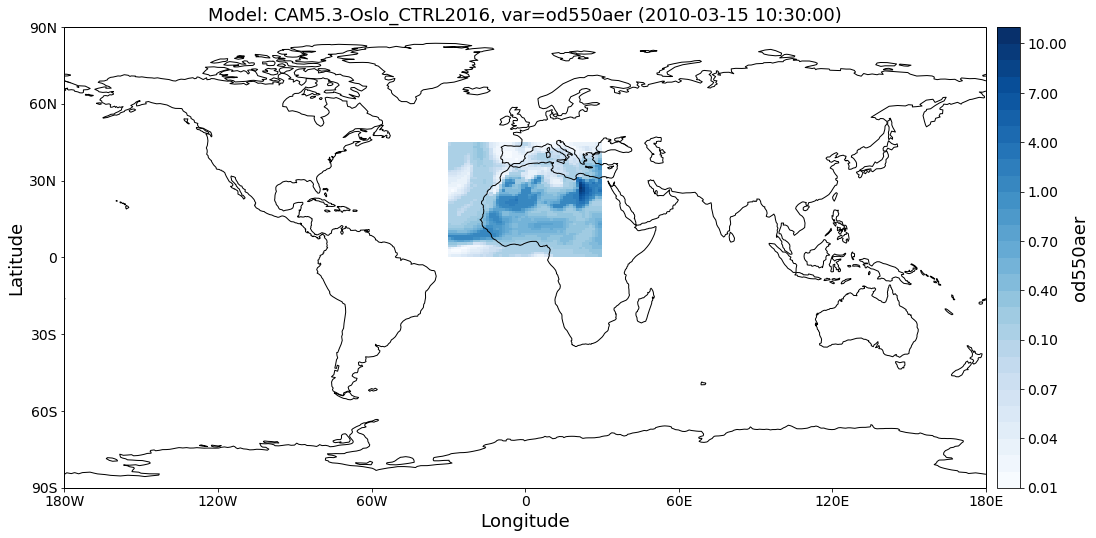

In [13]:
fig = dat_crop.quickplot_map()

#### Iterate over models and variables

The following cell iterates over all imported variables and models and plots the first time stamp of each result file.

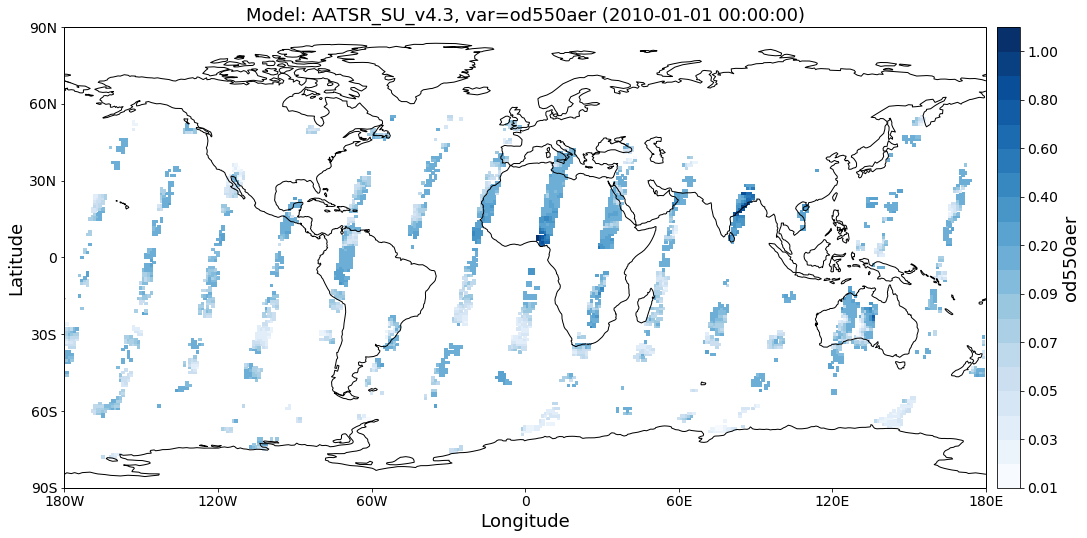

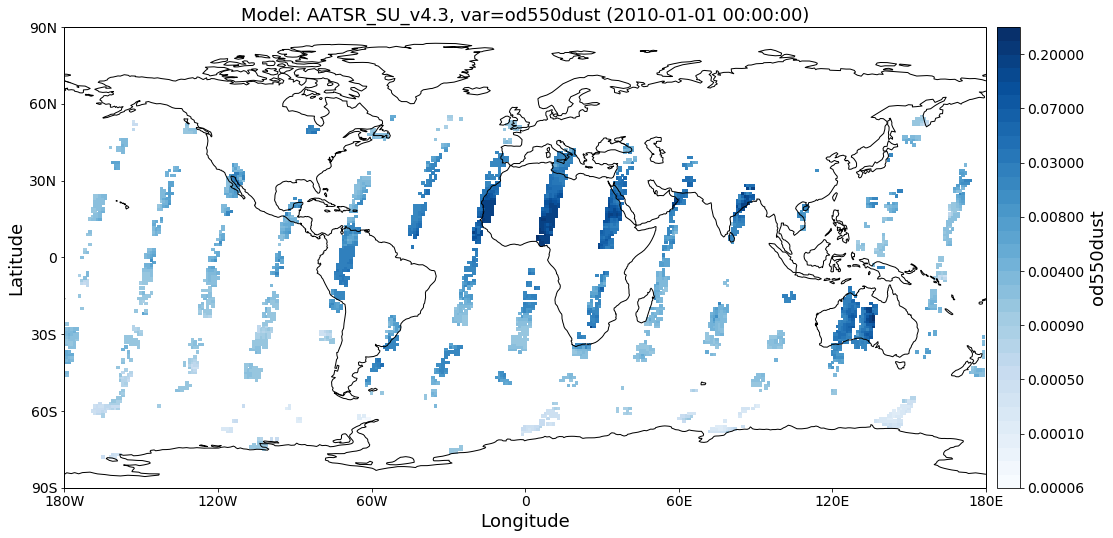

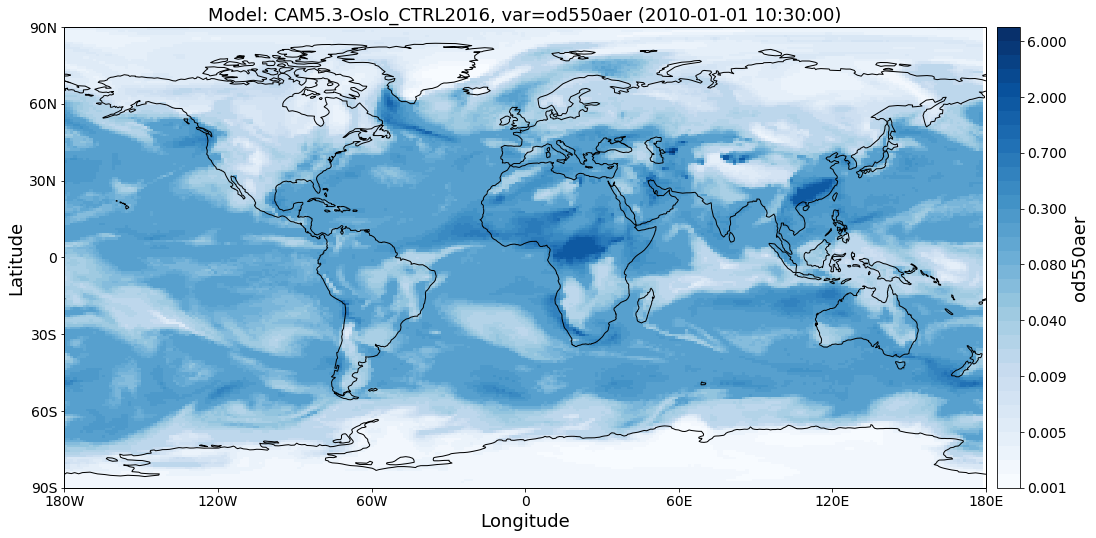

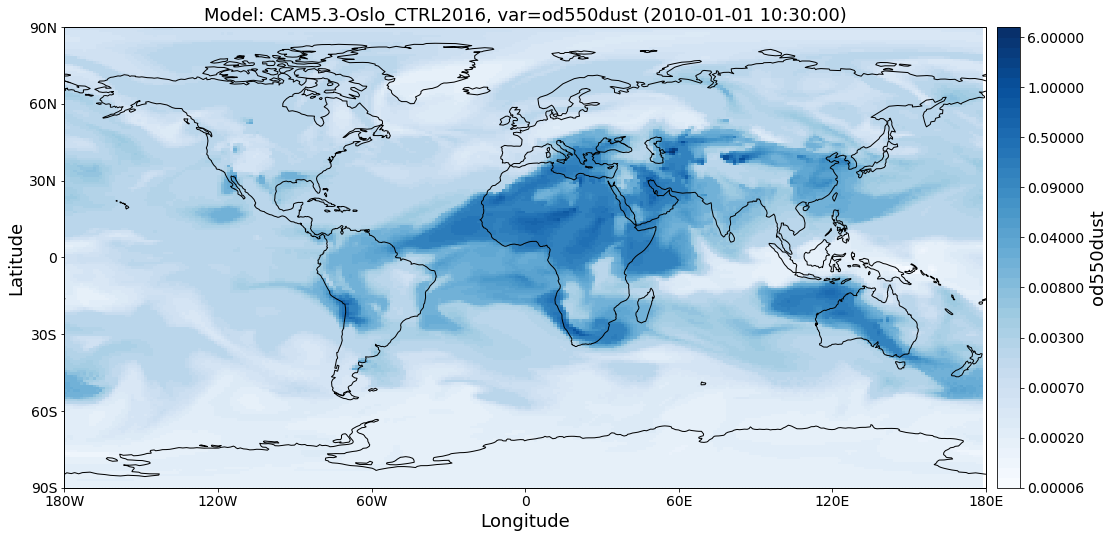

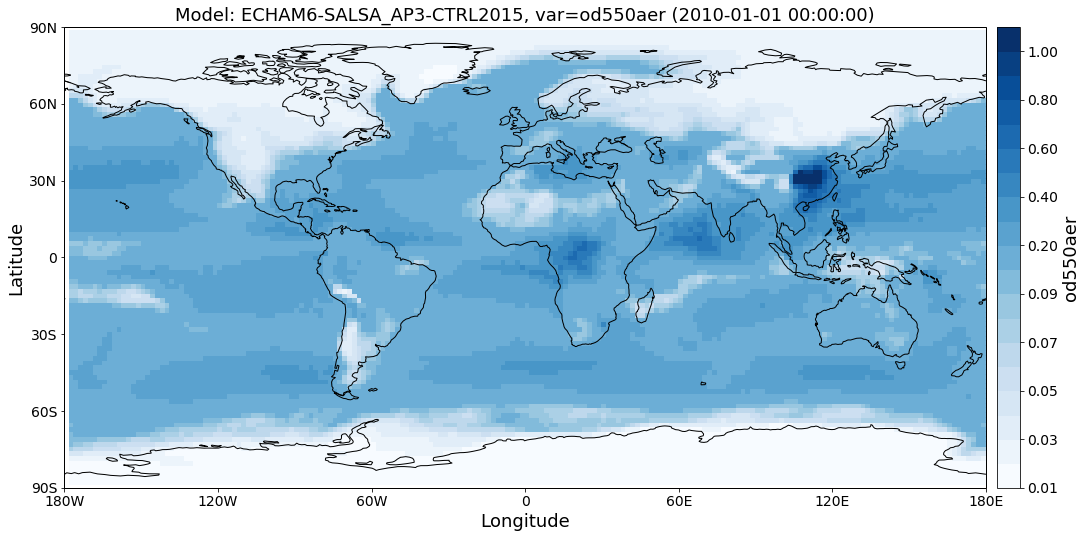

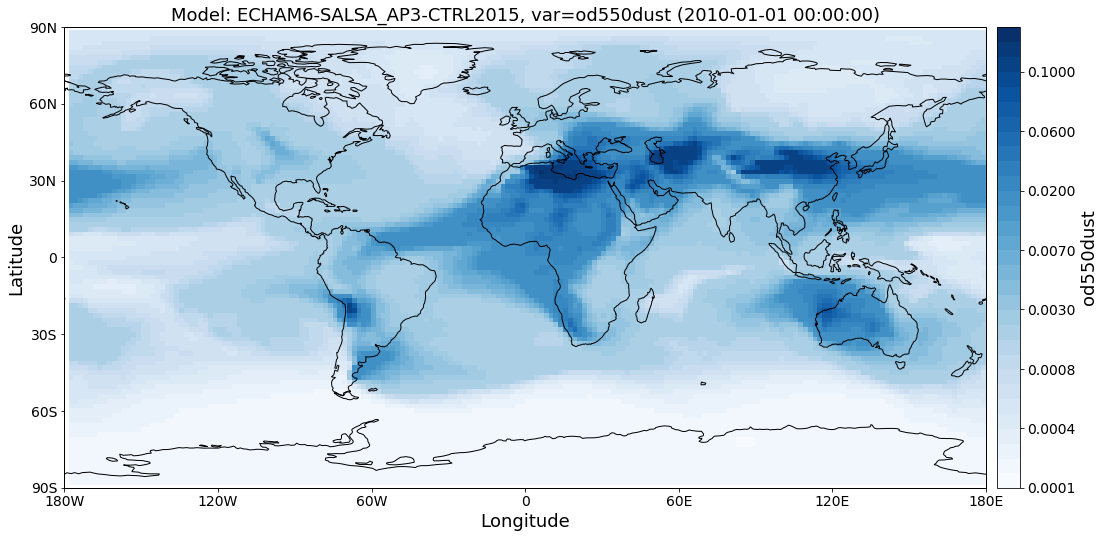

In [14]:
for name, result in read.results.items():
    for var_name, model_data in result.data.items():
        fig = model_data.quickplot_map()